# **import libraries**

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# **Load and Display the Dataset**

In [5]:
# Load the dataset
file_path = '/content/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
print(data.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


## **Data preprocessing**

In [26]:
# Aggregate data globally
global_data = data.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum().reset_index()

# Rename columns for clarity
global_data.columns = ['date', 'cases']

# Convert date column to datetime
global_data['date'] = pd.to_datetime(global_data['date'], errors='coerce')

# Set the date column as the index
global_data.set_index('date', inplace=True)

<ipython-input-26-47edd920fba1>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  global_data['date'] = pd.to_datetime(global_data['date'], errors='coerce')


## **Feature Engineering**

In [10]:
# Prepare data for imputation and model training
data_combined = global_data[['cases']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_combined_imputed = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# Create time series features
look_back = 7
X, y = [], []

for i in range(len(data_combined_imputed) - look_back):
    X.append(data_combined_imputed.iloc[i:i + look_back].values.flatten())
    y.append(data_combined_imputed.iloc[i + look_back].values)

X, y = np.array(X), np.array(y)

## **Split the data into training and testing sets**

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Implement the Random Forest Model**

In [39]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

<ipython-input-39-78893e8899d8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# **Model Evaluation**

In [40]:
# Predict the test set results
predictions = best_model.predict(X_test)

# Calculate the accuracy metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 153110682102.4605
R-squared: 0.999997309760805


## **Optimize the Model**

In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


## **Data Augmentation**

In [22]:
# Adding rolling statistics
global_data['rolling_mean_7'] = global_data['cases'].rolling(window=7).mean().shift(1)
global_data['rolling_std_7'] = global_data['cases'].rolling(window=7).std().shift(1)

# Drop rows with NaN values created by the rolling statistics
global_data = global_data.dropna()

# **Prediction Future Cases**

In [43]:
# Ensure that last_known_values is a DataFrame with correct column names
feature_names = global_data.columns.tolist()
future_predictions = []

# Initialize last known values
last_known_values = global_data[feature_names].iloc[-look_back:].values.flatten()

for _ in range(30):
    # Reshape last_known_values to match the expected input shape for the model
    current_features = pd.DataFrame([last_known_values], columns=feature_names*look_back)
    # Predict the next value
    next_pred = best_model.predict(current_features)[0]
    future_predictions.append(next_pred)
    # Update the last known values
    last_known_values = np.roll(last_known_values, -1)
    last_known_values[-1] = next_pred

future_dates = pd.date_range(start=global_data.index[-1] + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Confirmed': future_predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without featu

## **Visualization**

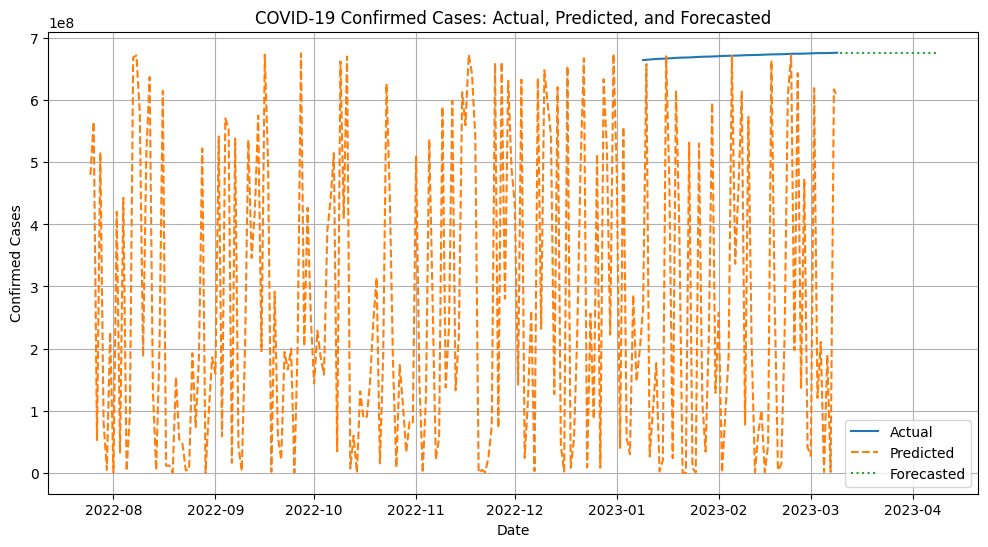

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(global_data.index[-60:], global_data['cases'][-60:], label='Actual')
plt.plot(global_data.index[-len(y_test):], predictions, label='Predicted', linestyle='--')
plt.plot(future_df['Date'], future_df['Predicted_Confirmed'], label='Forecasted', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases: Actual, Predicted, and Forecasted')
plt.legend()
plt.grid(True)
plt.show()
